# Homework 4

Due date: Jun 2, 2025

### Submission instructions: 
- __Autograder will be used for scoring, you are required to write a module in a file `hw4module.py` as in Homeworks 1 and 2.__ 
- You are also required to convert this notebook as a separate Python file, __`hw4.py`__.
- Online form will be there for you to make any disclosures.
- Submit __`hw4.ipynb`__ (this notebook), `hw4.py`, and `hw5module.py` on Gradescope under the window "Homework 4 - code". Do **NOT** change the file name. This will be checked by the autograder as well.
- Print this notebook as a pdf file, and submit on Gradescope under the window "Homework 4 - pdf".
  - Make sure all your code and text outputs in the problems are visible in your PDF submission.

Grading for the PDF side of this homework is specification-based; missing a spec will cost you at least four points (out of 100) per item.



## Introduction

What's your favorite movie? Wouldn't it be nice to find more shows that you might like to watch, based on ones you know you like? Tools that address questions like this are often called "recommender systems." Powerful, scalable recommender systems are behind many modern entertainment and streaming services, such as Netflix and Spotify. While most recommender systems these days involve machine learning, there are also ways to make recommendations that don't require such complex tools. 

In this homework, you'll use webscraping to answer the following question: 

> What movie or TV shows share actors with your favorite movie?

The idea of this question is that, if the movie Y has many of the same actors as the movie X, and you like X, you might also enjoy Y. 

This homework has two parts. In the first, larger part, you'll write a webscraper for finding shared actors on TMDB. In the second, smaller part, you'll use the results from your scraper to make recommendations. 

You need to meet the specifications for a complete list of what you need to do to obtain full credit. 

## Instructions

### 1. Setup

#### 1.1. Locate the Starting TMDB Page

Pick your favorite movie, and locate its TMDB page by searching on [https://www.themoviedb.org/](https://www.themoviedb.org/). For example, my favorite movie is _Harry Potter and the ~~Sorcerer's~~Philosopher's Stone_.
Its TMDB page is at:  

```
https://www.themoviedb.org/movie/671-harry-potter-and-the-philosopher-s-stone/
```

Save this URL for a moment. 

#### 1.2. Dry-Run Navigation

Now, we're just going to practice clicking through the navigation steps that our scraper will take. 

First, click on the *Full Cast & Crew* link. This will take you to a page with URL of the form 

```
<original_url>cast/
```

Next, scroll until you see the *Cast* section. Click on the portrait of one of the actors. This will take you to a page with a different-looking URL. For example, the URL for Alan Rickman, who played Severus Snape, is 

```
https://www.themoviedb.org/person/4566-alan-rickman
```

Finally, scroll down until you see the actor's *Acting* section. Note the titles of a few movies and TV shows in this section. 

Our scraper is going to replicate this process. Starting with your favorite movie, it's going to look at all the actors in that movie, and then log all the *other* movies or TV shows that they worked on. 

At this point, it would be a good idea for you to use the Developer Tools on your browser to inspect individual HTML elements and look for patterns among the names you are looking for.

#### 1.3. Create your module

No template is provided for this homework. You will write your two functions in a separate file `hw5module.py`.

#### 1.4. Some hints

You may run into `403` (forbidden) errors once the website detects that you’re a bot. See the web scraping lecture note and these links ([link1](https://doc.scrapy.org/en/latest/topics/practices.html#avoiding-getting-banned), [link2](https://scrapeops.io/python-scrapy-playbook/scrapy-403-unhandled-forbidden-error/), [link3](https://scrapeops.io/web-scraping-playbook/403-forbidden-error-web-scraping/), [link4](https://scrapingrobot.com/blog/most-common-user-agents/)) for how to work around that issue. Adding a delay for each page and changing user agent will often be most helpful!

Keep an eye out for `403` error you see! Make sure to examine the `status_code` attribute of the returned value from `requests.get()`. You want your status to be `200` (meaning OK). Print something if you see `403` (or raise an `Exception` if you are familiar with it).
If they know that you are on Python or if you are requesting pages without much delays, they will certainly try to block you. One way to change user agent on your code is presented in the lecture note. For the autograder to finish in reasonable time, please do not put the delays longer than two seconds between requests.

### 2. Write Your Scraper

Now, you will write a web scraper for a movie of your choice by giving its subdirectory on TMDB website as an argument. We will implement two parsing functions.

<!-- `parse(suffix)` should assume that you start on a movie page, and then navigate to the *Full Cast & Crew* page. Remember that this page has url `<movie_url>cast`. (You are allowed to hardcode that part.) Once there, the `parse_full_credits(suffix)` should be called. The `parse()` function does not return any data. This function should be no more than 5 lines of code, excluding comments and docstrings. Example: `parse("671-harry-potter-and-the-philosopher-s-stone")`.-->
- `parse_full_credits(movie_directory)` should assume that you start on the *Full Cast & Crew* page with the url `https://www.themoviedb.org/movie/<movie_directory>/cast`. Its purpose is to call the function `parse_actor_page(df, actor_directory)` for the page of each actor listed on the page. Crew members are not included (consider using `not` command in CSS selector). Initialize an empty `DataFrame` with two columns `actor` and `movie_or_TV_name`, then call the function `parse_actor_page` for each actor. The `parse_full_credits()` function returns the fully loaded `df`, with actor names and movie titles each actor worked on. The `DataFrame` should not have duplicate entries, and it should be sorted by actor name as the primary key, then movie titles. Try to avoid visiting the same page multiple times. 
  - Example: `df = parse_full_credits("671-harry-potter-and-the-philosopher-s-stone")`
- `parse_actor_page(df, actor_directory)` should assume that you start on the page of an actor. For each movie with the "Acting" role, you will add a row to the `DataFrame` `df` with two columns, `actor` and `movie_or_TV_name`. Please only include the works listed in "Acting" section of the actor page. Also, remove duplicate names within each actor's work. Keep in mind that "Acting" might not be on the top of their lists; for example, [David Holmes](https://www.themoviedb.org/person/1796507-david-holmes) is credited with an acting role in HP1, but spent most of his career as a stunt double of Daniel Radcliffe (as a part of Crew). On his page, you will see "Crew" before "Acting". 
Note that you will need to determine both the name of the actor and the name of each movie or TV show through parsing the HTML page. It should return the `DataFrame` `df` with all the works of the actor added at the end of `df`. 
  - Example: `df_updated = parse_actor_page(df, "10980-daniel-radcliffe")`

Provided that these functions are correctly implemented, you can run the code 
```python
df = parse_full_credits("671-harry-potter-and-the-philosopher-s-stone")
```
to create a `DataFrame` with a column for actors and another for movies or TV shows for _Harry Potter and the Philosopher's Stone_. You might want to save the result as a `.csv` file before proceeding to the next part.

Test your functions; make sure to check the following: 
- `parse_actor_page()`
  - only parses all the works under the "Acting" section
  - even if "Acting" is not on the top of the lists
  - remove duplicate work names within each actor (added 5/23)
- `parse_full_credits()` 
  - is parsing all the actors,
  - is not parsing crew members,
  - does not parse duplicate pages, and
  - of course, if the results are correct.

#### Challenge
If you’re looking for a challenge, think about ways that may make your recommendations more accurate. Consider scraping the number of episodes as well or limiting the number of actors you get per show to make sure you only get the main series cast. If you do so, please use separate function names.

### 3. Make Your Recommendations 

Once you're happy with the operation of your webscraper, compute a sorted list with the top movies and TV shows that share actors with your favorite movie. For example, it may have two columns: one for “movie names” and “number of shared actors”.

Feel free to be creative. You can show a pandas data frame, a chart using `matplotlib` or `plotly`, or any other sensible display of the results. 

### 4. Documentation

In this Jupyter Notebook, you should describe how your scraper works, as well as the results of your analysis. When describing your scraper, I recommend dividing it up into the two distinct parsing function, and discussing them one-by-one. For example: 

> *In this report, I'm going to make a super cool web scraper...*
> *Here's how we set up the project...*
> ```
> <implementation of parse()>
> ```
> *This function works by...*

> ```
> <implementation of parse_full_credits()>
> ```
> *To write this function, I...*

In addition to describing your scraper, your report should include a table and visualization of numbers of shared actors. 

You should guide your reader through the process of setting up and running the scraper.


## Specifications

### Coding Problem

1. Each of the two parsing methods are correctly implemented.
2. A table or list of results or pandas dataframe is shown.
3. A visualization with `matplotlib`, `plotly`, or `seaborn` is shown. 

### Style and Documentation

4. Each of the two `parse` functions has a short docstring describing its assumptions (e.g. what kind of page it is meant to parse) and its effect, including navigation and data outputs. 
5. Each of the two `parse` functions has helpful comments for understanding how each chunk of code operates. 

### Writing

6. The report is written in engaging and clear English. Grammar and spelling errors are acceptable within reason. 
7. The report explains clearly how to set up the project, run the scraper, and access the results. 
8. The report explains how each of the two `parse` methods works. 

To tackle this task, I have written two functions in a separate file called 'hw4module.py'. These two functions are called below to be used for this jupyter notebook. 

In [1]:
from hw4module import parse_actor_page, parse_full_credits

In [2]:
parse_full_credits("671-harry-potter-and-the-philosopher-s-stone")

/Users/palashraval/Desktop/Desktop - Palash’s MacBook Air/UCLA/BIOSTAT203C-Python/PythonDataScienceAssignments/HW4/hw4module.py:88: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 88 of the file /Users/palashraval/Desktop/Desktop - Palash’s MacBook Air/UCLA/BIOSTAT203C-Python/PythonDataScienceAssignments/HW4/hw4module.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(requests.get(link).text)
/Users/palashraval/Desktop/Desktop - Palash’s MacBook Air/UCLA/BIOSTAT203C-Python/PythonDataScienceAssignments/HW4/hw4module.py:21: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the 

,actor,movie_or_TV_name
41,Adrian Rawlins,10 Days to War
16,Adrian Rawlins,A Discovery of Witches
39,Adrian Rawlins,Agatha Christie's Marple
52,Adrian Rawlins,Ahead of the Class
11,Adrian Rawlins,All Creatures Great & Small
...,...,...
46,Zoë Wanamaker,Tony Awards
27,Zoë Wanamaker,Who Do You Think You Are?
49,Zoë Wanamaker,Wilde
19,Zoë Wanamaker,Wodehouse In Exile


The first function is called parse_actor_page(). This function, when provided a valid url link from 'themovie.df.org' will return a dataframe containing two columns: one for the actor name and one for the item in their filmography. This function is embedded within the second function called parse_full_credits().

The second function, parse_full_credits(), will use webscrapping to extract the href links for each of the cast members for the url link to a provided film. This function will then attach this href link to the base url and create a full url, which is then given to the parse_actor_page() to get the actor name and all items in their filmography as a dataframe. 



The dataframe created by parse_full_credits() is then saved to a variable called 'final'.

In [3]:
final = parse_full_credits("https://www.themoviedb.org/movie/1124-the-prestige")


/Users/palashraval/Desktop/Desktop - Palash’s MacBook Air/UCLA/BIOSTAT203C-Python/PythonDataScienceAssignments/HW4/hw4module.py:45: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 45 of the file /Users/palashraval/Desktop/Desktop - Palash’s MacBook Air/UCLA/BIOSTAT203C-Python/PythonDataScienceAssignments/HW4/hw4module.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(requests.get(link).text)
/Users/palashraval/Desktop/Desktop - Palash’s MacBook Air/UCLA/BIOSTAT203C-Python/PythonDataScienceAssignments/HW4/hw4module.py:8: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the b

Each element within the column 'film_or_TV_name' is counted to see how many actors appear in each of the films in the combined filmography. This is done using a dictionary, which is then sorted alphabetically with actor name first and then the film name.

In [7]:
final

,actor,movie_or_TV_name
91,Andy Serkis,13 Going on 30
104,Andy Serkis,24 Hour Party People
19,Andy Serkis,A Christmas Carol
86,Andy Serkis,A Filmmaker's Journey: Making 'The Return of t...
60,Andy Serkis,Accused
...,...,...
26,William Morgan Sheppard,Transformers
63,William Morgan Sheppard,Wild at Heart
8,William Morgan Sheppard,Young Justice
57,William Morgan Sheppard,seaQuest DSV


In [5]:
count_dictionary = {}

for s in final['movie_or_TV_name']:
    if s in count_dictionary.keys():
        count_dictionary[s] += 1
    else:
        count_dictionary[s] = 1


sort = sorted(count_dictionary.items(), key= lambda x: x[1], reverse= True)

In [8]:
sort

[('The Prestige', 50),
 ('Murder, She Wrote', 8),
 ("Late Night with Conan O'Brien", 6),
 ("The Director's Notebook: The Cinematic Sleight of Hand of Christopher Nolan",
  6),
 ('Honest Trailers', 5),
 ("Grey's Anatomy", 5),
 ('Criminal Minds', 5),
 ('Late Night with Seth Meyers', 4),
 ('The Late Show with Stephen Colbert', 4),
 ('Babylon 5', 4),
 ('The Dark Knight Rises', 4),
 ('JAG', 4),
 ('Frasier', 4),
 ('Gilmore Girls', 4),
 ('Tony Awards', 4),
 ('Diagnosis: Murder', 4),
 ('Castle', 4),
 ('Without a Trace', 4),
 ('The Graham Norton Show', 3),
 ('The Simpsons', 3),
 ('Angel', 3),
 ('Entertainment Tonight', 3),
 ('The Early Show', 3),
 ('The Late Late Show with Craig Kilborn', 3),
 ('MacGyver', 3),
 ('Star Trek: Voyager', 3),
 ('Elementary', 3),
 ('Parkinson', 3),
 ('Saturday Night Live', 3),
 ('The Tonight Show Starring Johnny Carson', 3),
 ('Monk', 3),
 ('Close Up with The Hollywood Reporter', 3),
 ('The Daily Show', 3),
 ('The Oscars', 3),
 ('The Tonight Show Starring Jimmy Fallo

The top 20 films with the highest count of shared actors are plotted in a bar graph, showing the best recommendations of what films people will like based on the acting performances they enjoyed in their favorite performances. 

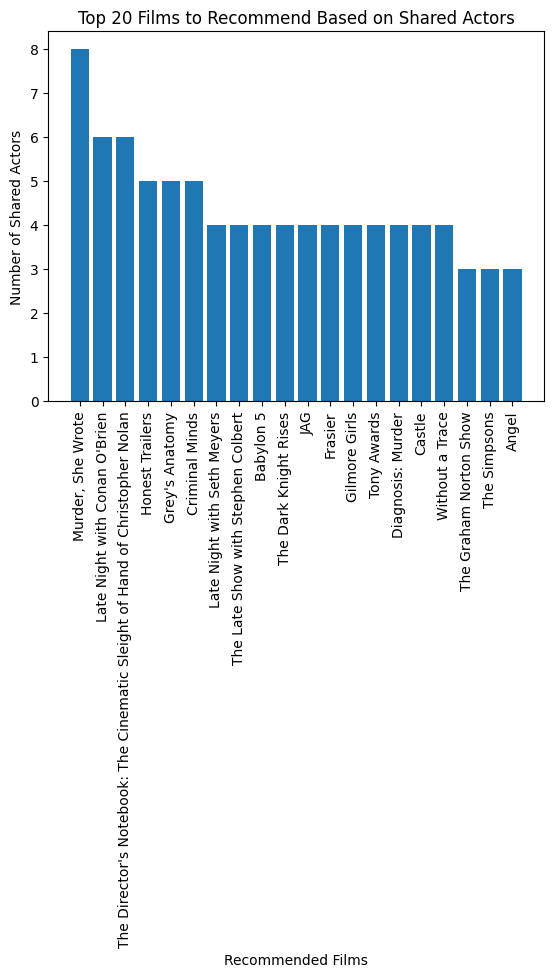

In [6]:
import matplotlib.pyplot as plt

films = [sort[n][0] for n in range(1, 21)]
counts = [sort[n][1] for n in range(1, 21)]

plt.bar(films, counts)
plt.xticks(films, rotation = 90)
plt.xlabel('Recommended Films')
plt.ylabel('Number of Shared Actors')
plt.title('Top 20 Films to Recommend Based on Shared Actors')
plt.show()